No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


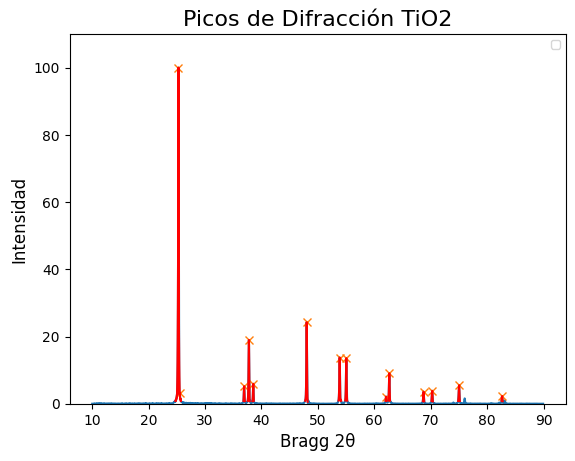

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Paso 1: Leer los datos
# Suponiendo que tienes un archivo CSV con dos columnas: '2Theta' y 'I'
data = pd.read_csv('Predict_unknown3_processed.xy', delim_whitespace=True)
data.columns = ['2Theta', 'I']
# Paso 2: Identificar los picos
# Utilizamos la función find_peaks de scipy
peaks, _ = find_peaks(data['I'], height=2)  # Ajusta el parámetro 'height' según tu dataset

# Paso 3: Extraer la información de cada pico
# Lista para almacenar los DataFrames de cada pico
# Umbral para definir la "baja intensidad"
threshold = 0.01 * np.max(data['I'])  # Puedes ajustar este valor

# Función para encontrar el borde izquierdo y derecho donde la intensidad cae por debajo del umbral
def find_edges(data, peak_index, threshold):
    # Búsqueda hacia atrás para encontrar donde la intensidad cae por debajo del umbral
    left = peak_index
    while left > 0 and data['I'][left] > threshold:
        left -= 1
    
    # Búsqueda hacia adelante para encontrar donde la intensidad cae por debajo del umbral
    right = peak_index
    while right < len(data) - 1 and data['I'][right] > threshold:
        right += 1
    
    return left, right

# Paso 3: Extraer la información de cada pico
picos_df = []

for peak in peaks:
    left_edge, right_edge = find_edges(data, peak, threshold)
    
    # Extraer el rango de datos desde el borde izquierdo al borde derecho
    pico_df = data.iloc[left_edge:right_edge + 1].reset_index(drop=True)
    picos_df.append(pico_df)

# Paso 4: Guardar o manipular los DataFrames
# Por ejemplo, podemos guardarlos en archivos separados
#for i, pico_df in enumerate(picos_df):
    #pico_df.to_csv(f'pico_{i}TI.csv', index=False)

# Visualizar los picos (opcional)
plt.plot(data['2Theta'], data['I'])
plt.plot(data['2Theta'][peaks], data['I'][peaks], "x")

for pico_df in picos_df:
    plt.plot(pico_df['2Theta'], pico_df['I'], 'r')

plt.xlabel('Bragg 2θ',fontsize=12)
plt.ylabel('Intensidad',fontsize=12)
plt.ylim(0, 110)
plt.title('Picos de Difracción TiO2', fontsize=16)
plt.legend(fontsize = 8)
plt.show()

plt.show()